In [0]:
 !pip install keras-bert

  Stored in directory: /root/.cache/pip/wheels/33/42/ad/477c5cc91e8973ffac1add1248229476674dbd9966e9e71aa8
  Stored in directory: /root/.cache/pip/wheels/d5/77/37/8fcad8efc82751342b5e19134629444394a316cee7e0955f4d
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Stored in directory: /root/.cache/pip/wheels/95/49/02/4eda210bc4c37ff1d45311665bceb790881dbea92b27b025a5
  Stored in directory: /root/.cache/pip/wheels/c3/9b/9e/f4072915f660e90bb3638332276f4de80476f3afcb5d010d6f
  Stored in directory: /root/.cache/pip/wheels/39/e2/e2/3514fef126a00574b13bc0b9e23891800158df3a3c19c96e3b
  Stored in directory: /root/.cache/pip/wheels/d1/bc/b1/b0c45cee4ca2e6c86586b0218ffafe7f0703c6d07fdf049866
  Stored in directory: /root/.cache/pip/wheels/cc/dc/17/84258b27a04cd38ac91998abe148203720ca696186635db694
Successfully built keras-bert keras-transformer keras-pos-embd keras-multi-head keras-layer-normalization keras-position-wise-feed-forward keras

In [0]:
! wget https://storage.googleapis.com/bert_models/2018_11_03/chinese_L-12_H-768_A-12.zip

--2019-07-19 02:56:27--  https://storage.googleapis.com/bert_models/2018_11_03/chinese_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381892918 (364M) [application/zip]
Saving to: ‘chinese_L-12_H-768_A-12.zip’

chinese_L-12_H-768_ 100%[===================>] 364.20M   124MB/s    in 2.9s    

2019-07-19 02:56:30 (124 MB/s) - ‘chinese_L-12_H-768_A-12.zip’ saved [381892918/381892918]



In [0]:
! unzip chinese_L-12_H-768_A-12.zip

Archive:  chinese_L-12_H-768_A-12.zip
   creating: chinese_L-12_H-768_A-12/
  inflating: chinese_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: chinese_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: chinese_L-12_H-768_A-12/vocab.txt  
  inflating: chinese_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: chinese_L-12_H-768_A-12/bert_config.json  


In [0]:
!ls

chinese_L-12_H-768_A-12  chinese_L-12_H-768_A-12.zip  sample_data


In [0]:
from keras_bert import extract_embeddings

model_path = './chinese_L-12_H-768_A-12'
texts = ['早安您好嗎', '大家好今天過得如何']

embeddings = extract_embeddings(model_path, texts)
embeddings 

Using TensorFlow backend.
W0719 02:56:41.882447 140531343673216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 02:56:41.932258 140531343673216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 02:56:42.004282 140531343673216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 02:56:42.005743 140531343673216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default inste

[array([[ 2.47075900e-01,  7.02328026e-01,  3.78113627e-01, ...,
          7.64840990e-02,  5.27268052e-01, -1.91601619e-01],
        [-5.01227081e-01,  7.66694069e-01, -1.89964294e-01, ...,
         -9.48816061e-01, -2.29286402e-01,  2.28691414e-01],
        [ 7.94875979e-01,  3.84324551e-01,  7.51619935e-01, ...,
         -2.37558454e-01,  1.07544684e+00,  8.03248584e-02],
        ...,
        [ 1.18856621e+00, -6.75102398e-02,  7.33694077e-01, ...,
          1.07459664e-01,  1.09753621e+00,  6.48184214e-04],
        [ 1.27186930e+00,  5.56207478e-01,  2.24585265e-01, ...,
         -6.70907140e-01,  3.85539144e-01,  2.33085155e-01],
        [ 5.58490306e-02,  6.72800541e-01, -1.11851305e-01, ...,
         -7.61431098e-01,  4.41256672e-01,  1.90137208e-01]], dtype=float32),
 array([[ 1.0108739 ,  0.78412545,  0.37318715, ...,  0.07056548,
          0.72151446, -0.13996327],
        [ 0.3374231 ,  0.02053704,  0.38087836, ..., -0.5718856 ,
         -0.1094461 , -0.04282379],
        [ 

##  分詞

In [0]:
from keras_bert import load_trained_model_from_checkpoint, Tokenizer
import codecs



config_path = './chinese_L-12_H-768_A-12/bert_config.json'
checkpoint_path = './chinese_L-12_H-768_A-12/bert_model.ckpt'
dict_path = './chinese_L-12_H-768_A-12/vocab.txt'

token_dict = {}
with codecs.open(dict_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        token_dict[token] = len(token_dict)

class OurTokenizer(Tokenizer):
    def _tokenize(self, text):
        R = []
        for c in text:
            if c in self._token_dict:
                R.append(c)
            elif self._is_space(c):
                R.append('[unused1]') # space类用未经训练的[unused1]表示
            else:
                R.append('[UNK]') # 剩余的字符是[UNK]
        return R

tokenizer = OurTokenizer(token_dict)
tokenizer.tokenize('今天天氣如何')

['[CLS]', '今', '天', '天', '氣', '如', '何', '[SEP]']

In [0]:
tokenizer.encode('今天天天氣如何')

([101, 791, 1921, 1921, 1921, 3706, 1963, 862, 102],
 [0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
#! wget https://github.com/jerrywu2013/BERT_NLU/raw/master/data/neg.xls
#! wget https://github.com/jerrywu2013/BERT_NLU/raw/master/data/pos.xls
#!ls

In [0]:
from keras_bert import Tokenizer

token_dict = {
    '[CLS]': 0,
    '[SEP]': 1,
    'un': 2,
    '##aff': 3,
    '##able': 4,
    '[UNK]': 5,
}
tokenizer = Tokenizer(token_dict)
print(tokenizer.tokenize('你吃飯了沒'))  # The result should be `['[CLS]', 'un', '##aff', '##able', '[SEP]']`
indices, segments = tokenizer.encode('unaffable')
print(indices)  # Should be `[0, 2, 3, 4, 1]`
print(segments)  # Should be `[0, 0, 0, 0, 0]`

print(tokenizer.tokenize(first='unaffable', second='钢'))
# The result should be `['[CLS]', 'un', '##aff', '##able', '[SEP]', '钢', '[SEP]']`
indices, segments = tokenizer.encode(first='unaffable', second='钢', max_len=10)
print(indices)  # Should be `[0, 2, 3, 4, 1, 5, 1, 0, 0, 0]`
print(segments)  # Should be `[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]`

['[CLS]', '你', '吃', '飯', '了', '沒', '[SEP]']
[0, 2, 3, 4, 1]
[0, 0, 0, 0, 0]
['[CLS]', 'un', '##aff', '##able', '[SEP]', '钢', '[SEP]']
[0, 2, 3, 4, 1, 5, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]


In [0]:
import numpy as np
from keras_bert import AdamWarmup, calc_train_steps

train_x = np.random.standard_normal((1024, 100))

total_steps, warmup_steps = calc_train_steps(
    num_example=train_x.shape[0],
    batch_size=32,
    epochs=10,
    warmup_proportion=0.1,
)

optimizer = AdamWarmup(total_steps, warmup_steps, lr=1e-3, min_lr=1e-5)

optimizer

In [0]:
#extract word embeddings
#https://github.com/CyberZHG/keras-bert/blob/master/demo/load_model/load_and_extract.py
import sys
import numpy as np
from keras_bert import load_vocabulary, load_trained_model_from_checkpoint, Tokenizer, get_checkpoint_paths


if len(sys.argv) == 2:
    model_path = sys.argv[1]
else:
    from keras_bert.datasets import get_pretrained, PretrainedList
    model_path = get_pretrained(PretrainedList.chinese_base)

paths = get_checkpoint_paths(model_path)



model = load_trained_model_from_checkpoint(paths.config, paths.checkpoint, seq_len=10)
model.summary(line_length=120)

token_dict = load_vocabulary(paths.vocab)

tokenizer = Tokenizer(token_dict)
text = '今天天氣如何'
tokens = tokenizer.tokenize(text)
print('Tokens:', tokens)
indices, segments = tokenizer.encode(first=text, max_len=10)

predicts = model.predict([np.array([indices]), np.array([segments])])[0]
for i, token in enumerate(tokens):
    print(token, predicts[i].tolist()[:5])

________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
Input-Token (InputLayer)               (None, 10)                 0                                                     
________________________________________________________________________________________________________________________
Input-Segment (InputLayer)             (None, 10)                 0                                                     
________________________________________________________________________________________________________________________
Embedding-Token (TokenEmbedding)       [(None, 10, 768), (21128,  16226304      Input-Token[0][0]                       
________________________________________________________________________________________________________________________
Embedding-Segment (Embedding)   

In [0]:
#上下文
#https://github.com/CyberZHG/keras-bert/blob/master/demo/load_model/load_and_predict.py
import sys
import numpy as np
from keras_bert import load_vocabulary, load_trained_model_from_checkpoint, Tokenizer, get_checkpoint_paths

if len(sys.argv) == 2:
    model_path = sys.argv[1]
else:
    from keras_bert.datasets import get_pretrained, PretrainedList
    model_path = get_pretrained(PretrainedList.chinese_base)

paths = get_checkpoint_paths(model_path)

model = load_trained_model_from_checkpoint(paths.config, paths.checkpoint, training=True, seq_len=None)
model.summary(line_length=120)

token_dict = load_vocabulary(paths.vocab)
token_dict_inv = {v: k for k, v in token_dict.items()}

tokenizer = Tokenizer(token_dict)
text = '今天天氣非常的好，我很喜歡，你也喜歡'
tokens = tokenizer.tokenize(text)
tokens[1] = tokens[2] = '[MASK]'
print('Tokens:', tokens)

indices = np.array([[token_dict[token] for token in tokens]])
segments = np.array([[0] * len(tokens)])
masks = np.array([[0, 1, 1] + [0] * (len(tokens) - 3)])

predicts = model.predict([indices, segments, masks])[0].argmax(axis=-1).tolist()
print('Fill with: ', list(map(lambda x: token_dict_inv[x], predicts[0][1:3])))


sentence_1 = '今天天氣非常的好，我很喜歡'
sentence_2 = '你也喜歡嗎'
print('Tokens:', tokenizer.tokenize(first=sentence_1, second=sentence_2))
indices, segments = tokenizer.encode(first=sentence_1, second=sentence_2)
masks = np.array([[0] * len(indices)])

predicts = model.predict([np.array([indices]), np.array([segments]), masks])[1]
print('%s is random next: ' % sentence_2, bool(np.argmax(predicts, axis=-1)[0]))

sentence_2 = '深度學習真的不容易學習。'
print('Tokens:', tokenizer.tokenize(first=sentence_1, second=sentence_2))
indices, segments = tokenizer.encode(first=sentence_1, second=sentence_2)
masks = np.array([[0] * len(indices)])

predicts = model.predict([np.array([indices]), np.array([segments]), masks])[1]
print('%s is random next: ' % sentence_2, bool(np.argmax(predicts, axis=-1)[0]))

381894656/381892918 [==============================] - 4s 0us/step
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
Input-Token (InputLayer)               (None, None)               0                                                     
________________________________________________________________________________________________________________________
Input-Segment (InputLayer)             (None, None)               0                                                     
________________________________________________________________________________________________________________________
Embedding-Token (TokenEmbedding)       [(None, None, 768), (21128 16226304      Input-Token[0][0]                       
______________________________________________________________________________________

In [0]:
import os
import keras
from keras_bert import get_model


model = get_model(
    token_num=30000,
    pos_num=512,
    transformer_num=12,
    head_num=12,
    embed_dim=768,
    feed_forward_dim=768 * 4,
)
model.summary(line_length=120)
current_path = os.path.dirname(os.__file__)
output_path = os.path.join(current_path, 'bert_small.png')
keras.utils.plot_model(model, show_shapes=True, to_file=output_path)

model = get_model(
    token_num=30000,
    pos_num=512,
    transformer_num=24,
    head_num=16,
    embed_dim=1024,
    feed_forward_dim=1024 * 4,
)
model.summary(line_length=120)
output_path = os.path.join(current_path, 'bert_big.png')
keras.utils.plot_model(model, show_shapes=True, to_file=output_path)

inputs, outputs = get_model(
    token_num=30000,
    pos_num=512,
    transformer_num=12,
    head_num=12,
    embed_dim=768,
    feed_forward_dim=768 * 4,
    training=False,
)
model = keras.models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics={})
model.summary(line_length=120)
current_path = os.path.dirname(os.__file__)
output_path = os.path.join(current_path, 'bert_trained.png')
keras.utils.plot_model(model, show_shapes=True, to_file=output_path)


________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
Input-Token (InputLayer)               (None, 512)                0                                                     
________________________________________________________________________________________________________________________
Input-Segment (InputLayer)             (None, 512)                0                                                     
________________________________________________________________________________________________________________________
Embedding-Token (TokenEmbedding)       [(None, 512, 768), (30000, 23040000      Input-Token[0][0]                       
________________________________________________________________________________________________________________________
Embedding-Segment (Embedding)   

In [0]:
os.path.dirname(os.__file__)

'/usr/lib/python3.6'

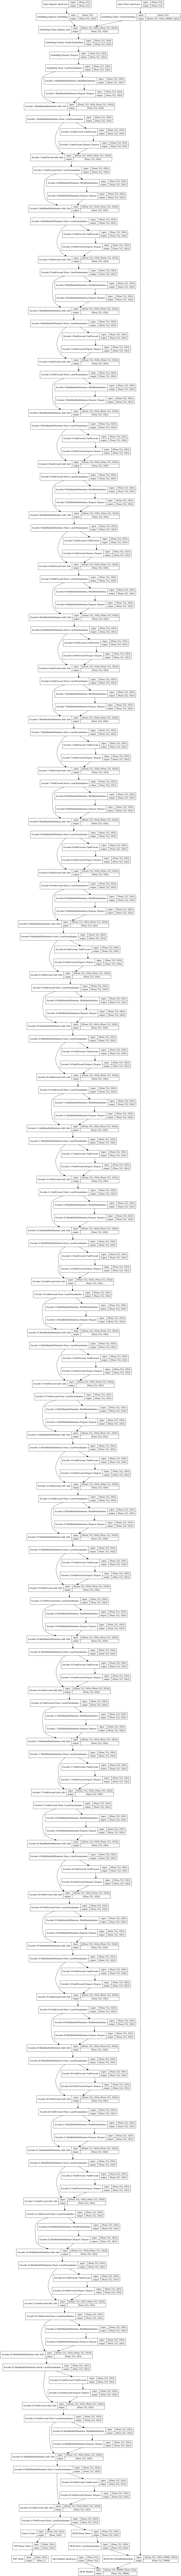

In [0]:
from IPython.display import Image
Image('/usr/lib/python3.6/bert_big.png')